<a href="https://colab.research.google.com/github/mikealeixogf/RNA_TensorFLow/blob/main/backpropagation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt #plota os gráficos
import numpy as np #biblioteca matemática de alto desempenho
import random as rd #escolhe os pesos sinápticos
import pandas as pd #arquivo pandas é importante para ler o arquivo excel
import scipy as sp
from scipy import stats

### Ainda falta:

> relatório com resultados

In [ ]:
# Função linear
def linear(x):
    y=x
    return x

# Função tangenge hiperbolica
def tanh(x):
    return np.tanh(x)

# Função logística
def logistica(x,b):
    y=1/(1+np.exp(-b-x))
    return y

# Função degrau
def degrau(x):
    return np.heaviside(x,1)


# Função degrau rampa
def gaussiana(x):
    return stats.norm.pdf(x, 0, 1)

b=1

### Rodando os códigos

In [ ]:
dados=pd.read_excel('/content/drive/MyDrive/dadosmamografia.xlsx') #este é o comando que abre o arquivo

#========================PRE PROCESSANDO OS DADOS DO ARQUIVO XLXS===============
#montando o split
treino=dados.iloc[:668, :5]
teste=dados.iloc[668:, :5]
targettreino=dados.iloc[:668,5:6]
targetteste=np.array(dados.iloc[668:, 5:6])

#função para normalização que usa o

def normaliza(dados_entrada):
    return dados_entrada.apply(lambda x:(x-x.min())/(x.max()- x.min()), axis=0)

#função que normaliza os dados de entrada de treino, validação e teste
treino_normalizado=normaliza(treino)
teste_normalizado=normaliza(teste)

#entradas dos Blocos da validação cruzada entre treino e validação normalizados
treinoA=np.array(treino_normalizado.iloc[:501, :]) #DADOS DE TREINO
validacaoB=np.array(treino_normalizado.iloc[501:, :]) #DADOS DE VALIDAÇÃO

#entradas dos dados de teste normalizados
entradaTeste=np.array(teste_normalizado)

#saída dos blocos de validação cruzada entre treino e validação
targetA=np.array(targettreino.iloc[:501, :]) #TARGET DE TREINO
targetB=np.array(targettreino.iloc[501:, :]) #TARGET DE VALIDAÇÃO


treino_normalizado.head(3)

,A,B,C,D,E
0,0.833333,0.628205,0.666667,1.0,0.666667
1,0.833333,0.512821,1.000000,1.0,0.666667
2,0.666667,0.128205,0.000000,0.0,0.666667


In [ ]:
#verificando o tamanho da matriz  de entrada Linhas=amostras, colunas=entradas
(amostras,entradas)=np.shape(treinoA)
#verificando o tamanho do vetor de saída linhas=amostras, coluna = saída
(amostras,saida)=np.shape(targetA)
neur=7 #numero de neuronios da camada intermediária

In [ ]:
#criando as matrizes de de pesos sinápticos aleatoriamente
#para a camada de entrada-intermediária
w1=np.zeros((entradas,neur)) #camada de entrada
aleatorio =0.2 #valor ótimo é 0.2

for i in range (entradas): #laço para linhas
  for j in range (neur): #laço para colunas
    w1[i][j]= rd.uniform(-aleatorio,aleatorio)#na linha i na coluna j

#criando os pesos dos bias da camada de entrada
wb1=np.zeros((1,neur))

for j in range (neur): #laço para colunas
  wb1[0][j]= rd.uniform(-aleatorio,aleatorio)#na linha i na coluna j


#print(f'é a matriz dos pesos sinápticos {vanterior} ')
print(np.shape(w1)) #aqui confirma o tamanho da matriz mxn (entradas x neuronios)
print(np.shape(wb1)) #aqui confirma o tamanho da matriz 1xn
print(w1)
print('')
print(wb1)

(5, 7)
(1, 7)
[[ 0.01519679 -0.01254952  0.16266296 -0.01803197 -0.17063733 -0.18232411
   0.04607519]
 [-0.05327908  0.15977898  0.02051473  0.06903121  0.08428787 -0.12731989
  -0.13081228]
 [-0.19598983  0.02851073  0.13308185  0.01816172 -0.09183505  0.19428061
   0.12639945]
 [ 0.13236102 -0.00197964  0.12128325 -0.13179415  0.09410791  0.07553976
  -0.19661025]
 [ 0.16767885  0.1912364   0.09940487  0.15201071 -0.10847086  0.092505
   0.11463231]]

[[-0.06374734 -0.09949485  0.14776189  0.17137279 -0.08718933  0.04336127
  -0.0521955 ]]


In [ ]:
#criando as matrizes de de pesos sinápticos aleatoriamente
#para a camada intermediária-saída
w2=np.zeros((neur,saida)) #camada desaida pura camada intermediaria

for j in range (neur): #laço para linhas
  for k in range (saida): #laço para colunas
    w2[j][k]= rd.uniform(-aleatorio,aleatorio)#na linha j na coluna k

#criando os pesos dos bias da camada intermediária
wb2=np.zeros((1,saida))
for j in range (saida): #laço para colunas
  wb2[0][j]= rd.uniform(-aleatorio,aleatorio)#na linha i na coluna j

print(np.shape(w2)) #aqui confirma o tamanho da matriz mxn (neuronios x saída)
print(np.shape(wb2)) #aqui confirma o tamanho da matriz 1xn
print(w2)
print('')
print(wb2)

(7, 1)
(1, 1)
[[ 0.1595643 ]
 [-0.06055295]
 [ 0.13230428]
 [-0.1205468 ]
 [ 0.02939103]
 [-0.03131028]
 [-0.09671354]]

[[0.14459628]]


In [ ]:
#alocação das matrizes do treinamento
w2novo=((neur,saida))
w1novo=((entradas,neur))
wb1novo=((1,neur))
wb2novo=((1,saida))
zin=np.zeros((amostras,neur)) # cria uma matriz m x n
zj=np.zeros((1,neur)) #cria uma matriz 1xn
deltinhak=np.zeros((saida,amostras)) #cria uma matrix 1 x m
deltaw0=np.zeros((saida,1)) #recebe os valores das bias wb2
deltav0=np.zeros((neur,1)) #recebe os valores das bias wb1
deltinhaj=np.zeros((1,neur))
ciclo=0
numepocas=400
etm=np.zeros(numepocas)
etm_validacao=np.zeros(numepocas)
listaciclo =[] #variavel para armezenar os ciclos
listaerro=[] #variavel para armazenar o ciclo

(amos,ent)=np.shape(validacaoB)
(amost,sai)=np.shape(targetB)

zin_validacao=np.zeros((amos,neur))
zj_validacao=np.zeros((1,neur))
eta=0.001

<ipython-input-59-2628f983dea5>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zin[i][j]=np.dot(treinoA[i,:],w1[:,j]) + wb1[:,j]
<ipython-input-59-2628f983dea5>:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zin_validacao[l][f]=np.dot(validacaoB[l,:],w1[:,f]) +wb1[:,f]


ciclo	 erro
1 	 [[89.73796308]]
ciclo	 erro
2 	 [[85.38375986]]
ciclo	 erro
3 	 [[81.60988648]]
ciclo	 erro
4 	 [[78.35358126]]
ciclo	 erro
5 	 [[75.54816818]]
ciclo	 erro
6 	 [[73.1288629]]
ciclo	 erro
7 	 [[71.03642302]]
ciclo	 erro
8 	 [[69.21886361]]
ciclo	 erro
9 	 [[67.63180215]]
ciclo	 erro
10 	 [[66.23800484]]
ciclo	 erro
11 	 [[65.00656026]]
ciclo	 erro
12 	 [[63.91194635]]
ciclo	 erro
13 	 [[62.9331332]]
ciclo	 erro
14 	 [[62.05278579]]
ciclo	 erro
15 	 [[61.25658616]]
ciclo	 erro
16 	 [[60.53267162]]
ciclo	 erro
17 	 [[59.8711764]]
ciclo	 erro
18 	 [[59.26386067]]
ciclo	 erro
19 	 [[58.70381175]]
ciclo	 erro
20 	 [[58.1852036]]
ciclo	 erro
21 	 [[57.70310327]]
ciclo	 erro
22 	 [[57.25331474]]
ciclo	 erro
23 	 [[56.83225269]]
ciclo	 erro
24 	 [[56.43683997]]
ciclo	 erro
25 	 [[56.06442421]]
ciclo	 erro
26 	 [[55.71270955]]
ciclo	 erro
27 	 [[55.37970064]]
ciclo	 erro
28 	 [[55.06365643]]
ciclo	 erro
29 	 [[54.76305201]]
ciclo	 erro
30 	 [[54.47654679]]
ciclo	 erro
31 	 [[54.2

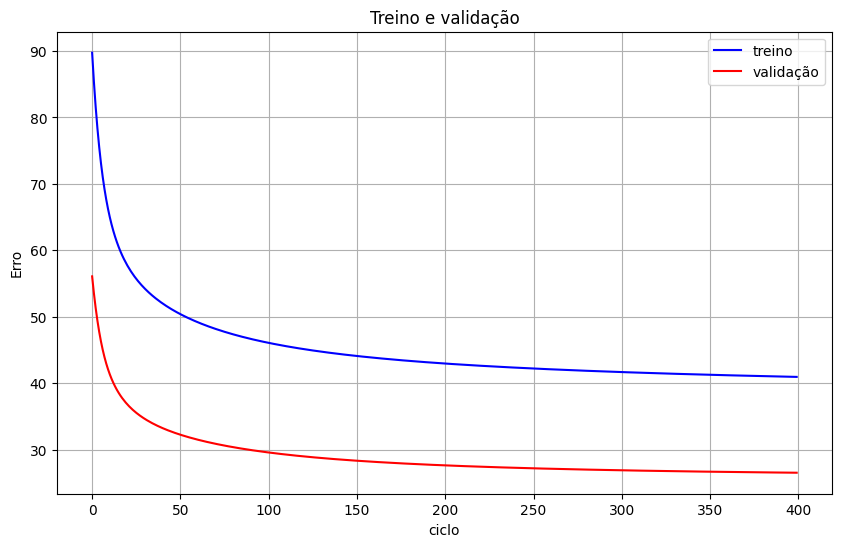

In [ ]:
# TREINO

for k in range(numepocas):
  errototal=0
  errototal_validacao=0
  for i in range(amostras):
    for j in range(neur):
      zin[i][j]=np.dot(treinoA[i,:],w1[:,j]) + wb1[:,j]
      zj= tanh(zin) #obs a TANH é a melhor aqui
    yin=np.dot(zj,w2) +wb2
    yk=tanh(yin)

    e=targetA-yk
    errototal=(e.transpose().dot(e)/2)


 #obter matrizes para atualização dos pesos
    deltinhak=(targetA.T-yk.T)*(1+yk.T)*(1-yk.T)
    deltaw=eta*(np.dot(deltinhak,zj))

  #matriz de atualização da camada intermediária
    deltinhain=np.dot(np.transpose(deltinhak),np.transpose(w2))
    deltinhain=np.dot(deltinhak.T,w2.T)

  #fatores de ajuste da camada de entrada
    deltinhaj=deltinhain*(1+zj)*(1-zj)

 # ajuste dos pesos da camada de entrada
    deltav=eta*np.dot(deltinhaj.T,treinoA)
    deltav0=eta*deltinhaj[j]
    w1novo=w1+np.transpose(deltav)
    wb1=wb1+deltav0
    w2novo=w2+np.transpose(deltaw)
    wb2=wb2+np.transpose(deltaw0)


##  VALIDAÇÃO
  for l in range(amos):
    for f in range(neur):
      zin_validacao[l][f]=np.dot(validacaoB[l,:],w1[:,f]) +wb1[:,f]
      zj_validacao= tanh(zin_validacao)
  yin_validacao=np.dot(zj_validacao,w2) + wb2
  yk_validacao=linear(yin_validacao)

  e_validacao=targetB-yk_validacao
  errototal_validacao=(e_validacao.transpose().dot(e_validacao))


  ciclo=ciclo+1
  listaciclo.append(ciclo)
  listaerro.append(errototal)
  print('ciclo\t erro')
  print(ciclo,'\t',errototal)


  etm[k]=errototal.mean() #mudei aqui também
  etm_validacao[k]=errototal_validacao.mean()
  w1=w1novo
w2=w2novo


plt.figure(figsize=(10, 6))
plt.plot(etm,'b',label='treino',) #mudei aqui
plt.plot(etm_validacao,'r',label='validação')
plt.xlabel('ciclo')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.title('Treino e validação')
plt.show()

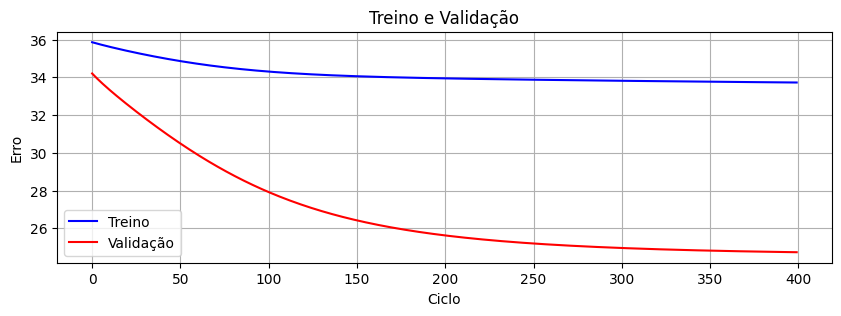



O erro no ciclo 400 foi de [[33.72830406]]


In [ ]:

plt.figure(figsize=(10, 3))
plt.plot(etm,'b',label='Treino',) #mudei aqui
plt.plot(etm_validacao,'r',label='Validação')
plt.xlabel('Ciclo')
plt.ylabel('Erro')
plt.legend()
plt.grid(True)
plt.title('Treino e Validação')
plt.savefig('validacaotreino.png',format='png')
plt.show()
print('')
print('')
print(f'O erro no ciclo {numepocas} foi de {errototal}')

In [ ]:
print(f'Peso w1  no ciclo após o cilo {numepocas}')
print(w1)
print(f'Bias wb1')
print('')
print(wb1)

Peso w1  no ciclo após o cilo 400
[[ 1.46902061 -0.81120504  1.28749718 -1.26026143  0.32853774 -0.6782791
  -0.99365119]
 [ 0.96993967 -0.40904004  0.80614539 -0.81057678  0.44067862 -0.48079443
  -0.85967044]
 [ 0.86930845 -0.61218233  0.86381925 -0.93433576  0.34224428 -0.23683522
  -0.65601414]
 [ 1.0504716  -0.56224282  0.7724392  -0.97401271  0.47081985 -0.29814728
  -0.86645123]
 [ 1.27585099 -0.43041363  0.97218983 -0.79702654  0.27696437 -0.29079483
  -0.68862083]]
Bias wb1

[[-2.67554508  0.9399916  -2.0497375   2.22402339 -0.59153003  0.58807748
   1.64182438]]


In [ ]:
print(f'Peso w2  no ciclo após o cilo {numepocas}')
print(w2)
print(f'Bias wb2')
print('')
print(wb2)

Peso w2  no ciclo após o cilo 400
[[ 0.18139652]
 [-0.08731574]
 [ 0.15674828]
 [-0.14095854]
 [ 0.04994463]
 [-0.05770539]
 [-0.12124936]]
Bias wb2

[[0.14459628]]


In [ ]:
#TESTE DA REDE
(amos,ent)=np.shape(entradaTeste)
(amost,sai)=np.shape(targetteste)

zin_validacao=np.zeros((amos,neur))
zj_validacao=np.zeros((1,neur))
limiar=0.5
y_validacao=[]
for i in range(amos):
  for j in range(neur):
    zin_validacao[i][j]=np.dot(entradaTeste[i,:],w1[:,j]) +wb1[:,j]
    zj_validacao=linear(zin_validacao)
  yin_validacao=np.dot(zj_validacao,w2) + wb2
  yk_validacao=linear(yin_validacao)

for k in (yk_validacao):
  if k>=limiar:
    yk_validacao=1
  else:
    yk_validacao=0
  y_validacao.append(yk_validacao)
erro1=targetteste.T-np.array(y_validacao)

print(erro1)



#se erro for 1-0 é falso positivo
#se erro for 0-1 é falso negativo
#se erro for 1-1 é verdadeiro positivo
#se erro for 0-0 é verdadeiro negativo

[[ 0 -1  0  0  0  0  0  1  0  0  0  0 -1  0  0  0  0 -1  0  0  0  0  0 -1
  -1  0  0  0  0  0  1  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  1  0 -1  0  0  0  0  0  0  0  0  0  0  0 -1
   0  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  0  0  0  0  0  0  0  0  0  0
   0  1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1
   0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  1 -1 -1  0
  -1  0 -1  0  0  0  0 -1 -1  0  0  0  0  0 -1  0  0  0  0 -1  0 -1]]


<ipython-input-62-1dd39ad0fdd0>:11: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  zin_validacao[i][j]=np.dot(entradaTeste[i,:],w1[:,j]) +wb1[:,j]


In [ ]:
print(len(targetteste))
total_iguais = np.sum(np.array(y_validacao) == targetteste.T)
total_diferentes=np.sum(np.array(y_validacao !=targetteste.T))
print(f'Acerto da rede {total_iguais}')
print(f'erros da rede {total_diferentes}')
total = len(targetteste)
acuracia = (total_iguais / total)*100

print(f'Acuracia: {(acuracia)}')

166
Acerto da rede 136
erros da rede 30
Acuracia: 81.92771084337349
